<a href="https://colab.research.google.com/github/Kommmi/Stochastic-dynamical-systems/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
a = np.random.rand(10)
b = np.random.rand(10)
c = a + b
print(c)

[1.05761802 0.62151176 0.84521283 1.54985587 0.79926185 0.67054318
 1.25206469 0.58997226 1.68707834 1.11543945]


In [7]:
!git clone https://github.com/Kommmi/Stochastic-dynamical-systems.git
import os
from IPython.display import clear_output
import sys
os.chdir('Stochastic-dynamical-systems')
!pip install POT joblib
from Gamma import *
clear_output()
print("Module ready to go :)")

Module ready to go :)


### Tent Map

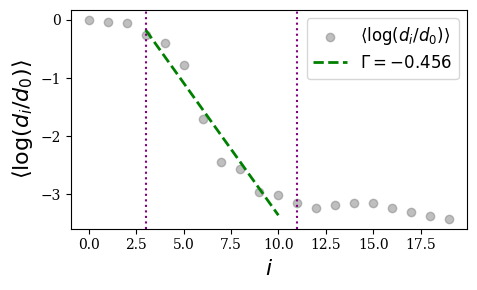

Γ (Gamma) = -0.4559,  R² = 0.9434


In [10]:
from Maps_1D import *
from scipy.stats import linregress
import matplotlib.pyplot as plt # Import matplotlib.pyplot


# ---------------------------------------------------------------------------
# 1. Parameters
# ---------------------------------------------------------------------------

a = 1.999                  # control parameter
Ns = 1_000_000             # number of samples
xmin, xmax = 0.0, 1.0    # domain bounds
traj_len = 20            # number of iterations
nits = 10                # ensemble repetitions
eps = 0.005              # perturbation amplitude
nbins = 50              # fixed number of histogram bins
index_limits = (3, 11)  # scaling region for fitting

# ---------------------------------------------------------------------------
# 2. Generate Initial Ensemble
# ---------------------------------------------------------------------------

x0s = Sampling_uniform(Ns, xmin, xmax)
params = (a,)

# ---------------------------------------------------------------------------
# 3. Compute Γ, log-distance evolution, and time array
# ---------------------------------------------------------------------------

Gamma_val, ln_avg_dist, t_arr = Gamma_SDE_1D_additive(
    Evolution_rule=tent_map,
    params=params,
    x0s=x0s,
    traj_len=traj_len,
    nits=nits,
    eps=eps,
    Bins_rule="Custom",
    custom_bins=nbins,
    index_limits=index_limits,
    rval=True
)

# ---------------------------------------------------------------------------
# 4. Fit and Plot Results (Equivalent to LLE_Distribution.pdf)
# ---------------------------------------------------------------------------

i0, i1 = index_limits
slope, intercept, r_value, _, _ = linregress(t_arr[i0:i1], ln_avg_dist[i0:i1])

plt.figure(figsize=(5, 3))
plt.rc('text', usetex=False) # Change usetex to False
plt.rc('font', family='serif')

plt.scatter(t_arr, ln_avg_dist, color='gray', alpha=0.5, label=r'$\langle \log(d_i/d_0) \rangle$')
plt.plot(t_arr[i0:i1],
         slope * t_arr[i0:i1] + intercept,
         'g--',
         linewidth=2,
         label=fr'$\Gamma = {slope:.3f}$')

plt.axvline(i0, color='purple', linestyle=':')
plt.axvline(i1, color='purple', linestyle=':')
plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$\langle \log(d_i/d_0) \rangle$', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Print summary
print(f"Γ (Gamma) = {slope:.4f},  R² = {r_value**2:.4f}")

### Homogenous sine map

### Heterogenous sine map